## Imports

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [10]:
df = pd.read_csv('data/data_eda.csv')

In [11]:
df.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [12]:
# Split date up into year, month, week, day for more
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week

In [13]:
df.set_index('Date', inplace=True)

In [19]:
# Dummify store Type - relative to Type A - d later
df = pd.get_dummies(columns = ['Type'], data = df, drop_first = True)

In [20]:
df.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Day,Year,Month,Week,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,151315,5,2010,2,5,False,False
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,151315,5,2010,2,5,False,False
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,151315,5,2010,2,5,False,False
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,151315,5,2010,2,5,False,False
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,151315,5,2010,2,5,False,False


### TTS

In [21]:
y = df['Weekly_Sales']
X = df.drop(columns = 'Weekly_Sales')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False, random_state=123)

In [23]:
model = XGBRegressor(random_state=123, n_jobs=4, n_estimators=20, max_depth=4)

In [24]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=4,
             num_parallel_tree=None, random_state=123, ...)

In [25]:
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

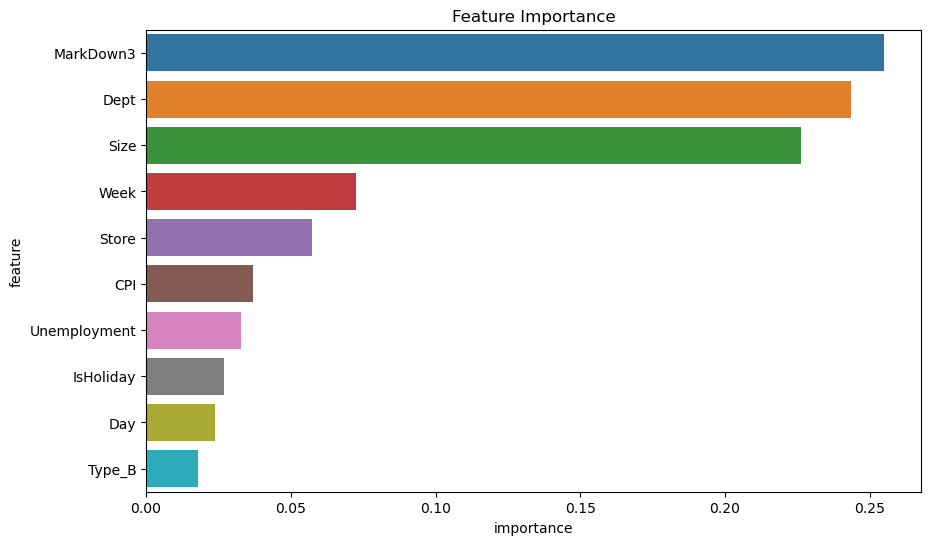

In [26]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [27]:
# Make and evaluate predictions:
x_pred = model.predict(X_test)
x_pred

array([ 9353.624  ,  9353.624  , 39896.28   , ..., 33655.84   ,
        5241.1504 ,   972.04456], dtype=float32)

In [28]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [29]:
rmse(x_pred,y_test)

12004.116488955386

## RF

In [30]:
RF = RandomForestRegressor()
# RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)

In [31]:
pgrid = {
    'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 500, num = 20)],
    'min_samples_leaf': [1, 2, 4, 3, 5],
    'max_features': [int(x) for x in np.linspace(start = 1, stop = 100, num = 20)],
    'max_depth': [int(x) for x in np.linspace(10, 300, num = 20)]
}

In [32]:
# Instantiate randomsearchCV
rf = RandomizedSearchCV(RF, pgrid, n_iter = 1, cv=5, n_jobs=8)

In [33]:
rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=1, n_jobs=8,
                   param_distributions={'max_depth': [10, 25, 40, 55, 71, 86,
                                                      101, 116, 132, 147, 162,
                                                      177, 193, 208, 223, 238,
                                                      254, 269, 284, 300],
                                        'max_features': [1, 6, 11, 16, 21, 27,
                                                         32, 37, 42, 47, 53, 58,
                                                         63, 68, 73, 79, 84, 89,
                                                         94, 100],
                                        'min_samples_leaf': [1, 2, 4, 3, 5],
                                        'n_estimators': [20, 45, 70, 95, 121,
                                                         146, 171, 196, 222,
                                                         247, 272, 297, 323,
                                                         348, 373, 398, 424,
                                                         449, 474, 500]})

In [34]:
rf.score(X_test, y_test)

0.7277367627280202

In [35]:
rf.best_params_

{'n_estimators': 171,
 'min_samples_leaf': 2,
 'max_features': 100,
 'max_depth': 208}

## Test data

In [36]:
data_test = pd.read_csv('data/data_test.csv')

In [37]:
# Split date up into year, month, week, day for more
data_test['Day'] = pd.to_datetime(data_test['Date']).dt.day
data_test['Year'] = pd.to_datetime(data_test['Date']).dt.year
data_test['Month'] = pd.to_datetime(data_test['Date']).dt.month
data_test['Week'] = pd.to_datetime(data_test['Date']).dt.isocalendar().week

In [38]:
data_test.set_index('Date', inplace=True)

In [39]:
data_test.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,...,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Day,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44
2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,...,False,False,False,False,False,False,2,2012,11,44


In [40]:
data_test.isna().sum().sort_values(ascending=False)

CPI             38162
Unemployment    38162
Temperature         0
Dept_43             0
Dept_37             0
                ...  
Store_31            0
Store_30            0
Store_29            0
Store_28            0
Week                0
Length: 141, dtype: int64

Missing values at the end for CPI and UE. Replace these with mean values for now

In [41]:
data_test = data_test.fillna(data_test.mean())

In [42]:
data_test.isna().sum().sort_values(ascending=False)

Temperature    0
Dept_43        0
Dept_37        0
Dept_38        0
Dept_39        0
              ..
Store_30       0
Store_29       0
Store_28       0
Store_27       0
Week           0
Length: 141, dtype: int64

In [43]:
test_preds = rf.predict(data_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Dept_10
- Dept_11
- Dept_12
- Dept_13
- Dept_14
- ...
Feature names seen at fit time, yet now missing:
- Dept
- Store


In [ ]:
data_test['pred'] = test_preds

## Submission

In [ ]:
submission1 = pd.read_csv('data/sampleSubmission.csv')

In [ ]:
submission1['Weekly_Sales'] = test_preds

In [ ]:
submission1.set_index('Id', inplace=True)

In [ ]:
submission1.to_csv('data/submission2_rf.csv')